# Time series

Components of time series:
- **Trend**
  - Tendency of data to show long-term upward or downward movement of data
- **Seasonality**
  - Repetitive upward and downward movements from the trend that occurs within calendar year at fixed interval where periodicity is constant
  - Examples: festivals, customs within the societies
- **Cyclical**
  - Fluctuation around the trend line at random interval where periodicity is not constant 
  - Examples: macro-economic changes cause recession, unemployment, etc.
- **Irregular component**
  - White noise or random uncorrelated changes that follows normal distribution

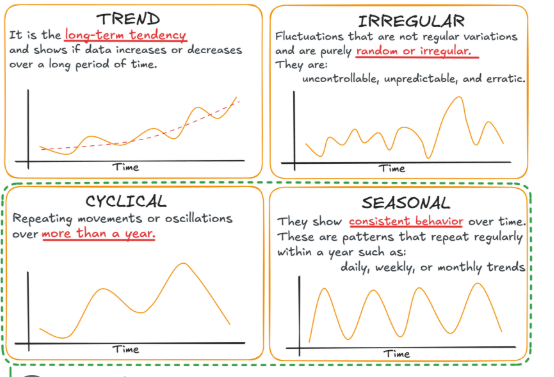

Time-series are generally of two types:
- **Additive time series**: 
  - Components (trend, seasonality, noise) are added to generate time series:
  - Time_series = trend + seasonality + noise
- **Multiplicative time series**: 
  - Components are multiplied to generate time series. One can notice an increase in the amplitude of seasonality in multiplicative time series
  - Time_series = trend * seasonality * noise

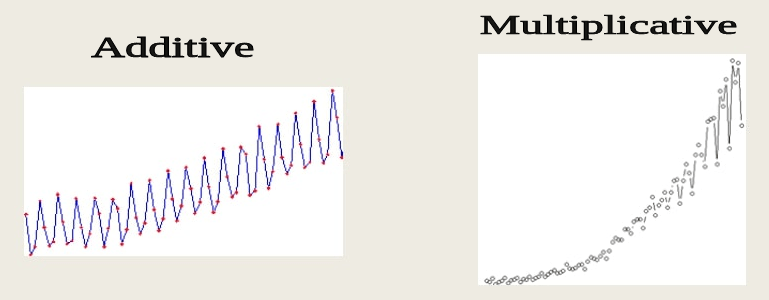


# Stationarity

Time series can be stationary and non-stationary:
- **Stationary time series**: time series whose statistical properties (mean, variance, and autocorrelation) do not vary over time. 
  - In simple terms, tt looks the same regardless of when you observe it.
  - Examples: 
    - White noise: a series where each value is a random number, independent of past values; 
    - Cyclic behaviour (if cycles are not fixed length): a series with repeating patterns, but the length of the cycles is not fixed 
- **Non-stationary**
  - Examples:
    - Time series with trends: a series where the mean is constantly increasing or decreasing over time
    - Time series with seasonality: a series with repeating patterns over fixed time intervals (e.g. sales data that spikes every December)

Achieve stationarity: 
- Visual inspection to check
- Statistical tests: Augmented Dickey-Fuller (ADF) 
- Transformations: applying mathematical transformations like differencing (subtracting consecutive values) or log transformations to remove trends and stabilise variance.

**Augmented Dickey-Fuller (ADF)**

Test whether a time series is seasonal or not.
- H0: the time series has a unit root, indicating it is non-stationary
- Ha: the time series is stationary
- p-value < 0.05 : reject the H0 -> this suggests that the time series is stationary. 
- p_value > 0.05 ; fail to reject the H0 -> the time series is non-stationary

# Models

- **ARIMA (Autoregressive Integrated Moving Average)**
  - A versatile model that captures autoregressive, integrated, and moving average components of a time series.
- **SARIMA (Seasonal ARIMA)**
  - An extension of ARIMA that incorporates seasonal components
- **SARIMAX (Seasonal ARIMA with Exogenous Regressors)**
  - Extends SARIMA, accounts for seasonality and external factors. Can accommodate both autoregressive and moving average components; 
- **Exponential Smoothing**
  - Assigns exponentially decreasing weights to past observations, giving more weight to recent data
- **Moving Averages (MA)**
- **Autoregressive (AR)**
- **Vector Autoregression (VAR)**
- **Neural Networks**
  - E.g. LSTM
- **Prophet**
  - Developed by Facebook, designed for forecasting time series data with strong seasonality and trend components; 


# Some examples

## Example 1

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

2020-01-01     0.917990
2020-02-01     7.692842
2020-03-01    13.962133
Freq: MS, dtype: float64
2028-02-01    90.434416
2028-03-01    92.742838
2028-04-01    97.843157
Freq: MS, dtype: float64


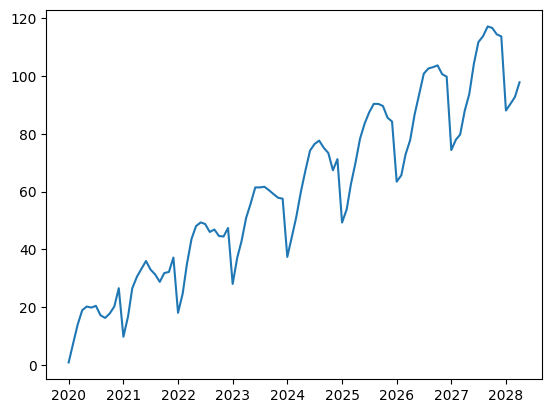

In [89]:
# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn() for i in range(100)]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
print(time_series.head(3))
print(time_series.tail(3))
plt.plot(time_series)

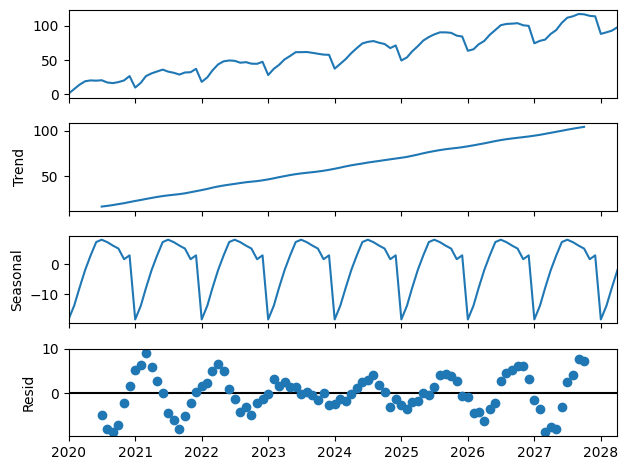

In [90]:
decomposition = seasonal_decompose(time_series, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [91]:
# Test of Augmented Dickey Fuller:
print(f'T-test: {adfuller(time_series)[0]}')
p_value = adfuller(time_series)[1]
print(f'P-value: {p_value:.3f}')
if p_value < 0.05:
    print(f"> Reject the H0. Time series seems to be stationary.")
else:
    print(f"> Fail to reject the H0. Time series seems to be non-stationary.")

T-test: -0.26846714768815894
P-value: 0.930
> Fail to reject the H0. Time series seems to be non-stationary.


In [ ]:
# Let's separate the data into train and test
train = time_series.loc[
    time_series.index[0] : 
    time_series.index[int(len(time_series)*0.8)]
]

test = time_series.loc[
    time_series.index[int(len(time_series)*0.8)] :
] 

train_start = train.head(1).index[0].strftime("%Y-%m-%d")
train_end   = train.tail(1).index[0].strftime("%Y-%m-%d")
test_start  = test.head(1).index[0].strftime("%Y-%m-%d")
test_end    = test.tail(1).index[0].strftime("%Y-%m-%d")
print(f"Train: from {train_start} to {train_end}")
print(f"Test: from {test_start} to {test_end}")

Train: from 2020-01-01 to 2026-09-01
Test: from 2026-09-01 to 2028-04-01


c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


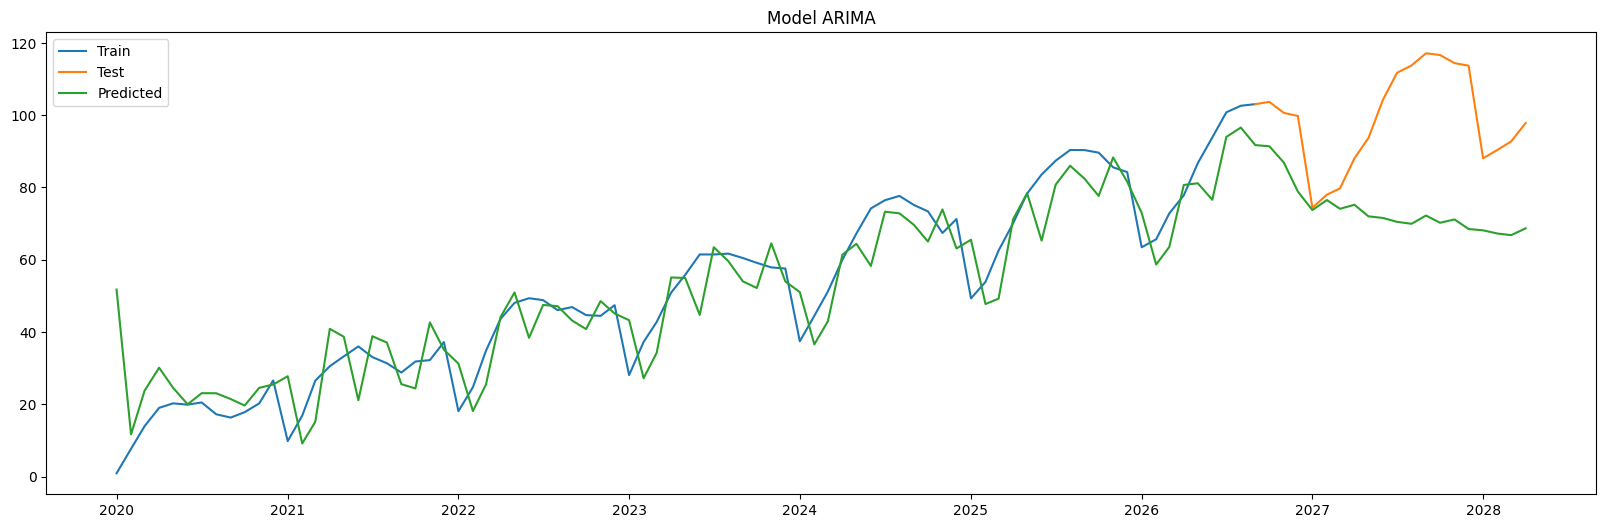

In [ ]:
# First, let's train ARIMA model
model_arima = ARIMA(train, 
                    order=(0, 0, 3),
                    seasonal_order=(1, 0, 1, 7)
).fit()

pred_model_arima = model_arima.predict(start=train_start, end=test_end)

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_arima)
plt.title('Model ARIMA')
plt.legend(['Train', 'Test', 'Predicted'])

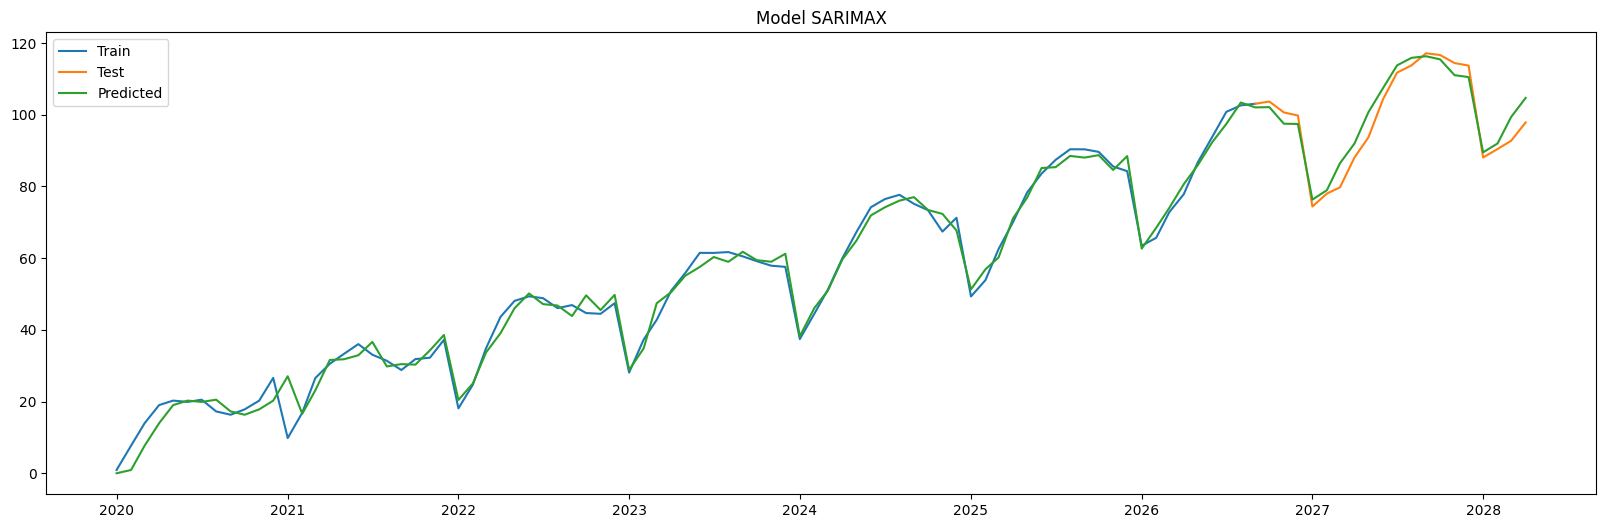

In [ ]:
# Now, let's train SARIMAX
model_sarimax = SARIMAX(train, 
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12)
).fit(disp=False)

pred_model_sarimax = model_sarimax.predict(start='2020-01-01', end='2028-04-01')

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_sarimax)
plt.title('Model SARIMAX')
plt.legend(['Train', 'Test', 'Predicted'])
